In [24]:
import os
import torch
import pymongo
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from deep_fields import models_path

crypto_plots_dir = os.path.join(models_path,"crypto_plots")
if not os.path.isdir(crypto_plots_dir):
    os.makedirs(crypto_plots_dir)

from deep_fields import data_path
from deep_fields.data.crypto.create_dataset_files import create_merged_dataframe

client = pymongo.MongoClient()
db = client["crypto"]
db.collection_names()

<ipython-input-24-305e656970fa>:19: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  db.collection_names()


['birth_birth_2021-06-14',
 'birth_2021-06-08',
 'birth_2021-06-21',
 'birth_2021-06-20',
 'birth_2021-06-02',
 'birth_2021-05-10',
 'birth_2021-06-14',
 'birth_2021-06-16',
 'birth_2021-06-17',
 'birth_2021-06-19',
 'birth_2021-06-18']

In [9]:
collection = db['birth_2021-06-14']

In [10]:
collection.count_documents({})

7834

In [11]:
collection.create_index([('survival_time',-1)])

'survival_time_-1'

In [12]:
collection.create_index([('survival_time',1)])

'survival_time_1'

In [19]:
birth_and_name = {}
birth_dates = []
for a in collection.find():
    birth_dates.append(a["birth_date"])
    birth_and_name[a["id"]] = a["birth_date"]

In [33]:
date0 = datetime(2018,1,1)
datef = datetime(2019,1,1)

In [26]:
names = []
for name, date in birth_and_name.items():
    if date0 < date and datef > date:
        names.append(name)

In [29]:
name_and_survival = []

{'_id': ObjectId('60c859a92895ec6e393f44b3'),
 'id': 'blockchain-certified-data-token',
 'symbol': 'bcdt',
 'name': 'Blockchain Certified Data Token',
 'last_price': 0.19175078033935633,
 'last_volume': 19355.53289863258,
 'last_marketcap': 6969306.784261523,
 'survival_time': 927,
 'last_date': datetime.datetime(2021, 6, 15, 2, 0),
 'birth_date': datetime.datetime(2018, 9, 30, 0, 0)}

In [44]:
def coins_in_a_window(date0,datef,collection,survival=True):
    if not survival:
        coins_ = [a["id"] for a in collection.find({"birth_date":{"$gt":date0,"$lt":datef}})]
    else:
        coins_ = [(a["survival_time"],a["id"]) 
                  for a in collection.find({"birth_date":{"$gt":date0,"$lt":datef}})]
        coins_.sort()
        coins_ = coins_[::-1]
    return coins_

def coins_before(date0,collection):
    coins_ = [a["id"] for a in collection.find({"birth_date":{"$lt":date0}})]
    return coins_

In [45]:
coins_in_a_window(date0,datef,collection,survival=True)

[(1258, 'storm'),
 (1256, 'appcoins'),
 (1255, 'time-new-bank'),
 (1255, 'aelf'),
 (1254, 'wax'),
 (1250, 'zap'),
 (1250, 'medibloc'),
 (1250, 'bread'),
 (1249, 'spankchain'),
 (1247, 'lightning-bitcoin'),
 (1247, 'karbo'),
 (1246, 'nebulas'),
 (1246, 'mixin'),
 (1246, 'htmlcoin'),
 (1246, 'echolink'),
 (1243, 'united-traders-token'),
 (1243, 'matryx'),
 (1242, 'inflationcoin'),
 (1241, 'polis'),
 (1240, 'singularitynet'),
 (1240, 'bibox-token'),
 (1239, 'yee'),
 (1239, 'topchain'),
 (1239, 'tokenbox'),
 (1239, 'scry-info'),
 (1239, 'moac'),
 (1239, 'iostoken'),
 (1239, 'investdigital'),
 (1239, 'aurora-dao'),
 (1239, 'aichain'),
 (1239, 'acute-angle-cloud'),
 (1238, 'unlimitedip'),
 (1238, 'true-chain'),
 (1238, 'trinity-network-credit'),
 (1238, 'theta-token'),
 (1238, 'qunqun'),
 (1238, 'oneroot-network'),
 (1238, 'molecular-future'),
 (1238, 'mobius'),
 (1238, 'lamden'),
 (1238, 'kcash'),
 (1238, 'indahash'),
 (1238, 'high-performance-blockchain'),
 (1238, 'educare'),
 (1238, 'data

In [14]:
unique_birth_dates = list(set(birth_dates))
unique_birth_dates.sort()
birth_time_series = dict(zip(unique_birth_dates,np.zeros(len(unique_birth_dates))))
for birth in birth_dates:
    birth_time_series[birth]+=1
birth_time_series = pd.Series(birth_time_series)

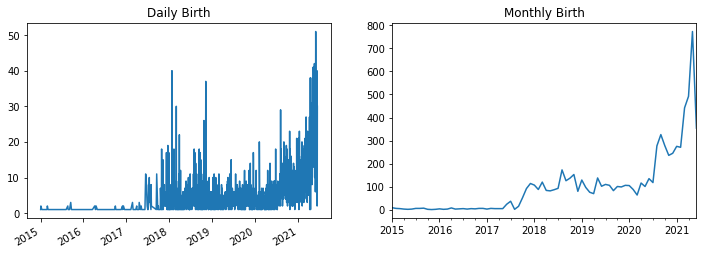

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))

axes[0].title.set_text('Daily Birth')
axes[1].title.set_text('Monthly Birth')

birth_time_series[1:].plot(ax=axes[0])
birth_time_series[1:].resample("M").sum().plot(ax=axes[1])

fig.savefig(os.path.join(crypto_plots_dir,"birth.png"))

'c:\\users\\cesar\\desktop\\projects\\general\\deep_random_fields\\results'